<a href="https://colab.research.google.com/github/suryansh-raghuvanshi-data/ML-Projects/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install gdown
!pip install gdown

In [ ]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install pyarrow

In [ ]:
import gdown

In [ ]:
!gdown 1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT

Downloading...
From (original): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
From (redirected): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT&confirm=t&uuid=1e64aeb4-30bc-4dff-8985-e74744b87875
To: /kaggle/working/ninjacart_data.zip
100%|████████████████████████████████████████| 275M/275M [00:04<00:00, 60.4MB/s]


In [ ]:
%%capture
!unzip ninjacart_data

In [ ]:
!pip install seaborn

In [ ]:
# Import common libraries
import os
import glob
import random
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import tensorflow and its modules
import tensorflow as tf
from tensorflow import keras # this allows <keras.> instead of <tf.keras.>
from tensorflow.keras import layers,callbacks # this allows <layers.> instead of <tf.keras.layers.>
tf.keras.utils.set_random_seed(111) # set random seed

# To supress any warnings during the flow
import warnings
warnings.filterwarnings('ignore')

2024-02-15 23:58:00.935961: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 23:58:00.936087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 23:58:01.291977: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
file_path = '/kaggle/working/ninjacart_data/train'

In [ ]:
class_dirs = os.listdir(file_path) # list all directories inside "train" folder
image_dict = {} # dict to store image array(key) for every class(value)
count_dict = {} # dict to store count of files(key) for every class(value)
# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'/kaggle/working/ninjacart_data/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

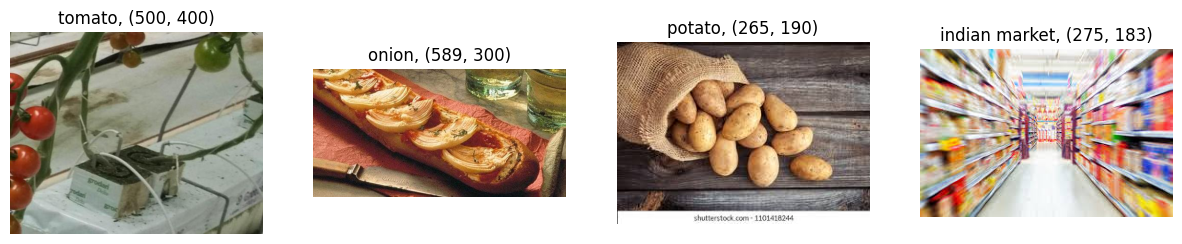

In [ ]:
## Viz Random Sample from each class

plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(3, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

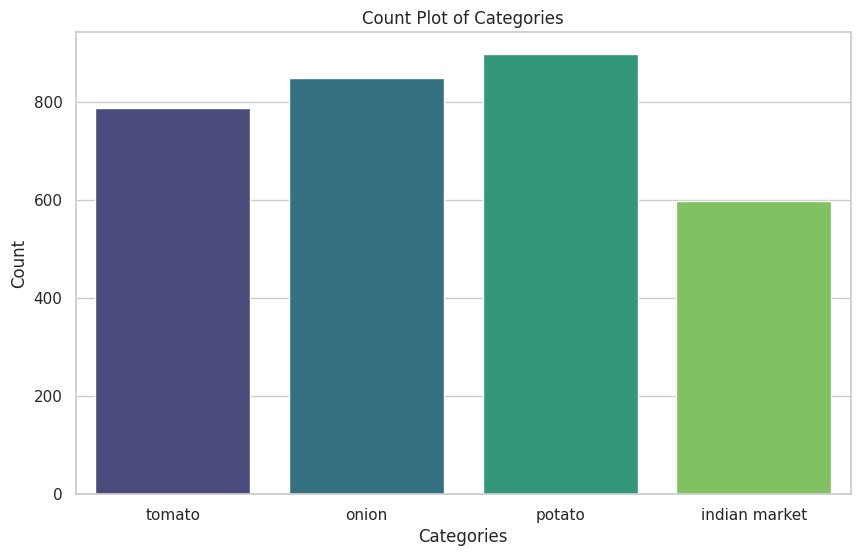

In [ ]:
# Convert the dictionary to a pandas DataFrame
data_df = pd.DataFrame(list(count_dict.items()), columns=['Category', 'Count'])

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Category',y = 'Count', data=data_df, palette="viridis")
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count Plot of Categories')
plt.show()

In [ ]:
#Load image from directory


train_data = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/ninjacart_data/train", shuffle = True,    validation_split=0.2,
    subset="training",
    seed=42
)

val_data = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/ninjacart_data/train", shuffle = True,    validation_split=0.2,
    subset="validation",
    seed=42

)

test_data = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/ninjacart_data/test", shuffle = False
)

Found 3135 files belonging to 4 classes.
Using 2508 files for training.
Found 3135 files belonging to 4 classes.
Using 627 files for validation.
Found 351 files belonging to 4 classes.


In [ ]:
model_alex = keras.Sequential()

In [ ]:
input_shape = (256, 256, 3)

model_alex = keras.Sequential()

# Convolutional Block 1
model_alex.add(layers.Conv2D(128, (3, 3), padding='same', input_shape=input_shape))
model_alex.add(layers.BatchNormalization())
model_alex.add(layers.Activation('relu'))
model_alex.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))


# Convolutional Block 2
model_alex.add(layers.Conv2D(256, (3, 3), padding='same'))
model_alex.add(layers.BatchNormalization())
model_alex.add(layers.Activation('relu'))
model_alex.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))


# Convolutional Block 3
model_alex.add(layers.Conv2D(52, (3, 3), padding='same'))
model_alex.add(layers.BatchNormalization())
model_alex.add(layers.Activation('relu'))
model_alex.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))


# Convolutional Block 4
model_alex.add(layers.Conv2D(28, (3, 3), padding='same'))
model_alex.add(layers.BatchNormalization())
model_alex.add(layers.Activation('relu'))
model_alex.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))


# Fully Connected Layers
model_alex.add(layers.GlobalAveragePooling2D())
model_alex.add(layers.Dense(units=256, activation='relu'))
model_alex.add(layers.BatchNormalization())
model_alex.add(layers.Dropout(0.5))
model_alex.add(layers.Dense(units=512, activation='relu'))
model_alex.add(layers.BatchNormalization())
model_alex.add(layers.Dropout(0.5))
model_alex.add(layers.Dense(units=100, activation='relu'))
model_alex.add(layers.BatchNormalization())
model_alex.add(layers.Dropout(0.5))
model_alex.add(layers.Dense(units=4, activation='softmax'))

In [ ]:
model_alex.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping_callback = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True)

In [ ]:
model_fit = model_alex.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10


I0000 00:00:1707946151.239893     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


79/79 [==============================] - 34s 229ms/step - loss: 1.0898 - accuracy: 0.6411 - val_loss: 1.6490 - val_accuracy: 0.2440
Epoch 2/10
79/79 [==============================] - 15s 177ms/step - loss: 0.6922 - accuracy: 0.7620 - val_loss: 1.9524 - val_accuracy: 0.3270
Epoch 3/10
79/79 [==============================] - 15s 178ms/step - loss: 0.6201 - accuracy: 0.7719 - val_loss: 1.3056 - val_accuracy: 0.5726
Epoch 4/10
79/79 [==============================] - 15s 177ms/step - loss: 0.5969 - accuracy: 0.7887 - val_loss: 2.3335 - val_accuracy: 0.3285
Epoch 5/10
79/79 [==============================] - 15s 177ms/step - loss: 0.5417 - accuracy: 0.8038 - val_loss: 1.1203 - val_accuracy: 0.5582
Epoch 6/10
79/79 [==============================] - 15s 176ms/step - loss: 0.4672 - accuracy: 0.8289 - val_loss: 1.1756 - val_accuracy: 0.5582
Epoch 7/10
79/79 [==============================] - 15s 177ms/step - loss: 0.4870 - accuracy: 0.8194 - val_loss: 1.3223 - val_accuracy: 0.5582
Epoch 8/10

MOdel is over fitting.

In [ ]:
# Plot training history

def plot_train_acc(model_fit):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ax = axes.ravel()

    # Accuracy graph
    ax[0].plot(range(1, len(model_fit.history['accuracy']) + 1), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
    ax[0].plot(range(1, len(model_fit.history['val_accuracy']) + 1), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
    ax[0].set_title('Accuracy vs. epoch', fontsize=15)
    ax[0].set_ylabel('Accuracy', fontsize=15)
    ax[0].set_xlabel('epoch', fontsize=15)
    ax[0].legend()

    # Loss graph
    ax[1].plot(range(1, len(model_fit.history['loss']) + 1), model_fit.history['loss'], label='Train', color='b')
    ax[1].plot(range(1, len(model_fit.history['val_loss']) + 1), model_fit.history['val_loss'], label='Val', color='r')
    ax[1].set_title('Loss vs. epoch', fontsize=15)
    ax[1].set_ylabel('Loss', fontsize=15)
    ax[1].set_xlabel('epoch', fontsize=15)
    ax[1].legend()

    # Display the graph
    plt.show()

In [ ]:
# Plot learning rate values over epochs
def plot_lr(learning_rates):
    plt.plot(learning_rates, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate Schedule')
    plt.show()

In [ ]:
#Plot accuracy and confusion matrix

def plot_acc_cm(test_data,model):
    true_categories = tf.concat([y for x, y in test_data], axis=0)
    images = tf.concat([x for x, y in test_data], axis=0)
    y_pred = model.predict(test_data)
    class_names = test_data.class_names
    predicted_categories = tf.argmax(y_pred, axis=1)

    test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
    print(f'\nTest Accuracy: {test_acc:.2f}%\n')

    # Create the confusion matrix
    conf_matrix = metrics.confusion_matrix(true_categories, predicted_categories)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print the classification report
    print("Classification Report:")
    print(metrics.classification_report(true_categories, predicted_categories))

Adding Learning rate scheduler

In [ ]:
# Create a learning rate schedule
initial_learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
)


In [ ]:
# Define a custom callback to get learning rate values
class LearningRateCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.lr)
        print(f'Learning Rate at epoch {epoch + 1}:  {lr}')
        learning_rates.append(lr)

# Create an empty list to store learning rate values
learning_rates = []

In [ ]:
# Compile the model with the learning rate schedule
model_alex.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Increasing the no, of epochs and decay of learning rate to tackle overfitting

In [ ]:
model_fit = model_alex.fit(
    train_data,
    validation_data=val_data,
    epochs=30, callbacks=[early_stopping_callback,LearningRateCallback()]
)

Epoch 1/30
79/79 [==============================] - 15s 177ms/step - loss: 0.4788 - accuracy: 0.8254 - val_loss: 2.0268 - val_accuracy: 0.5726
Epoch 2/30
79/79 [==============================] - 15s 177ms/step - loss: 0.5005 - accuracy: 0.8198 - val_loss: 2.0475 - val_accuracy: 0.5231
Epoch 3/30
79/79 [==============================] - 15s 176ms/step - loss: 0.4768 - accuracy: 0.8333 - val_loss: 4.0485 - val_accuracy: 0.3461
Epoch 4/30
79/79 [==============================] - 15s 177ms/step - loss: 0.4587 - accuracy: 0.8357 - val_loss: 1.9526 - val_accuracy: 0.5774
Epoch 5/30
79/79 [==============================] - 14s 176ms/step - loss: 0.4892 - accuracy: 0.8218 - val_loss: 3.4243 - val_accuracy: 0.4370
Epoch 6/30
79/79 [==============================] - 15s 178ms/step - loss: 0.4215 - accuracy: 0.8457 - val_loss: 1.1850 - val_accuracy: 0.6204
Epoch 7/30
79/79 [==============================] - 15s 176ms/step - loss: 0.4098 - accuracy: 0.8489 - val_loss: 1.7726 - val_accuracy: 0.5550

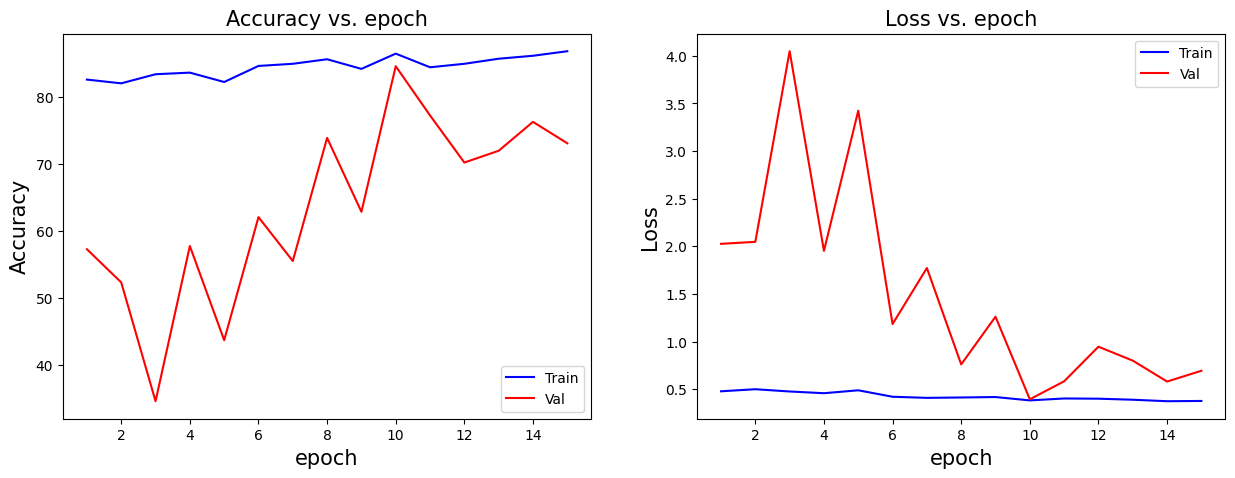

In [ ]:
plot_train_acc(model_fit)

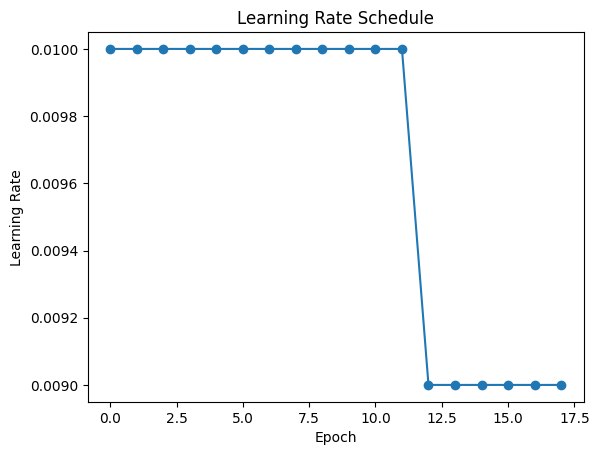

In [ ]:
plot_lr(learning_rates)

In [ ]:
plot_acc_cm(test_data,model_alex)

11/11 [==============================] - 3s 306ms/step

Test Accuracy: 82.62%



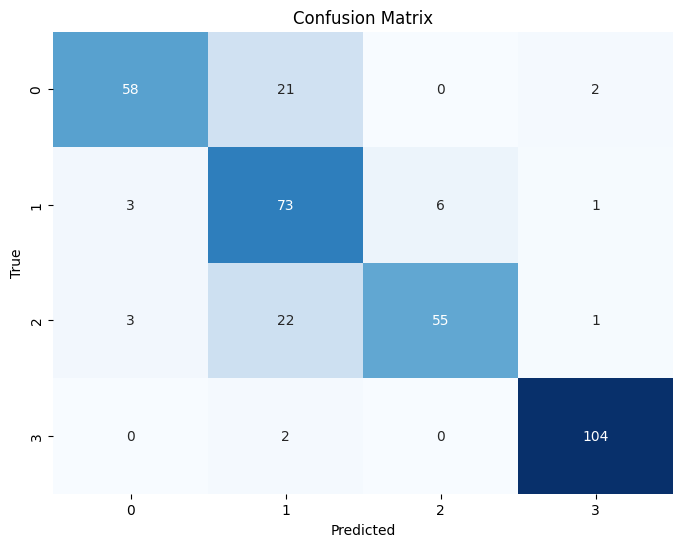

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80        81
           1       0.62      0.88      0.73        83
           2       0.90      0.68      0.77        81
           3       0.96      0.98      0.97       106

    accuracy                           0.83       351
   macro avg       0.85      0.81      0.82       351
weighted avg       0.85      0.83      0.83       351



# Using Transfer learning for pre-trained models

In [ ]:
#Load the base model
input_shape = (256, 256, 3)
base_model = keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape,
    pooling=keras.layers.GlobalAveragePooling2D(),
    classifier_activation="softmax",
)

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
# Freeze the pretrained layers
base_model.trainable = False

In [ ]:
# Create a new model with a custom output layer
model_inception = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(4, activation='softmax')  # Adjust NUM_CLASSES based on your task
])

In [ ]:
# Create a learning rate schedule
initial_learning_rate = 1e-5

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
)

In [ ]:
# Compile the model with the learning rate schedule
model_inception.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

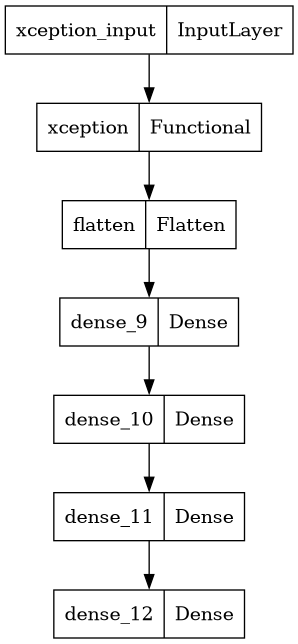

In [ ]:
plot_model(model_inception)

In [ ]:
model_fit = model_inception.fit(
    train_data,
    validation_data=val_data,
    epochs=30, callbacks=[early_stopping_callback,LearningRateCallback()]
)

Epoch 1/30
79/79 [==============================] - 19s 178ms/step - loss: 0.0770 - accuracy: 0.9753 - val_loss: 2.1173 - val_accuracy: 0.7321
Epoch 2/30
79/79 [==============================] - 13s 156ms/step - loss: 0.0560 - accuracy: 0.9801 - val_loss: 2.1182 - val_accuracy: 0.7368
Epoch 3/30
79/79 [==============================] - 13s 155ms/step - loss: 0.0438 - accuracy: 0.9848 - val_loss: 2.1328 - val_accuracy: 0.7384
Epoch 4/30
79/79 [==============================] - 12s 145ms/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 2.1472 - val_accuracy: 0.7368
Epoch 5/30
79/79 [==============================] - 13s 155ms/step - loss: 0.0303 - accuracy: 0.9924 - val_loss: 2.1664 - val_accuracy: 0.7400
Epoch 6/30
79/79 [==============================] - 13s 155ms/step - loss: 0.0255 - accuracy: 0.9932 - val_loss: 2.1880 - val_accuracy: 0.7448
Epoch 7/30
79/79 [==============================] - 12s 145ms/step - loss: 0.0218 - accuracy: 0.9952 - val_loss: 2.2086 - val_accuracy: 0.7448

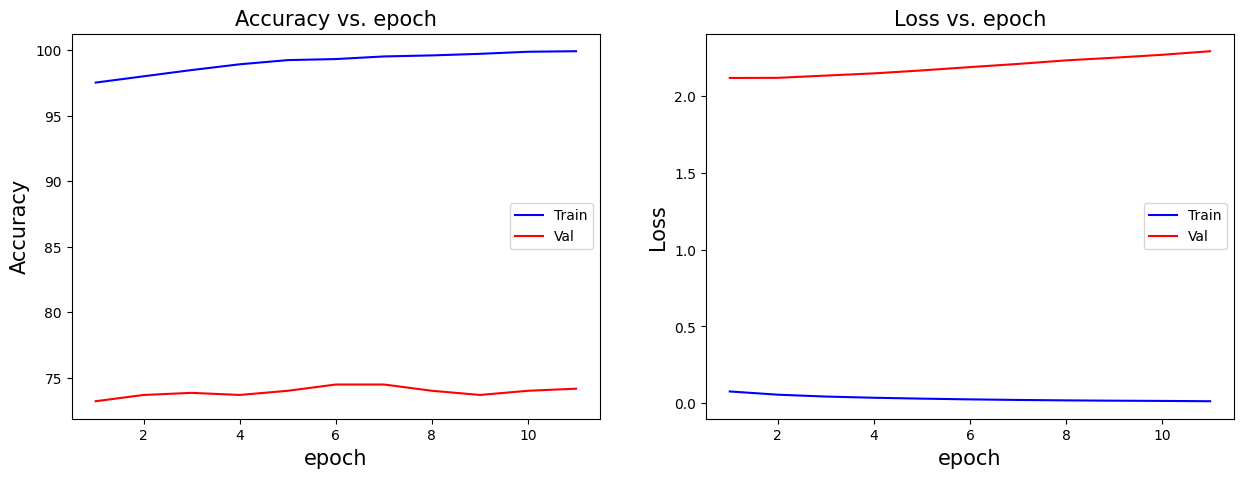

In [ ]:
plot_train_acc(model_fit)

Using data agumentation to decrease the undefitting of the model

In [ ]:
# Define the data augmentation parameters
data_augmentation = ImageDataGenerator(
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'     # Fill mode for points outside the input (e.g., reflecting the image)
)

# Using data augmentation with the training set
train_data_augmented = data_augmentation.flow_from_directory(
    "/kaggle/working/ninjacart_data/train",  # Adjust the path accordingly
    target_size=(256,256),            # Adjust the target size based on your model's input size
    batch_size=32,
    class_mode='sparse',               # Adjust the class mode based on your task
    subset='training'
)


Found 3135 images belonging to 4 classes.


In [ ]:
model_fit = model_inception.fit(
    train_data_augmented,
    validation_data=val_data,
    epochs=100, callbacks=[early_stopping_callback,LearningRateCallback()]
)

Epoch 1/100
98/98 [==============================] - 56s 570ms/step - loss: 0.6148 - accuracy: 0.7276 - val_loss: 0.5096 - val_accuracy: 0.7624
Epoch 2/100
98/98 [==============================] - 55s 557ms/step - loss: 0.5989 - accuracy: 0.7321 - val_loss: 0.5249 - val_accuracy: 0.7703
Epoch 3/100
98/98 [==============================] - 55s 562ms/step - loss: 0.5751 - accuracy: 0.7480 - val_loss: 0.4528 - val_accuracy: 0.8038
Epoch 4/100
98/98 [==============================] - 54s 554ms/step - loss: 0.5719 - accuracy: 0.7553 - val_loss: 0.5509 - val_accuracy: 0.7464
Epoch 5/100
98/98 [==============================] - 55s 557ms/step - loss: 0.5849 - accuracy: 0.7445 - val_loss: 0.4548 - val_accuracy: 0.8070
Epoch 6/100
98/98 [==============================] - 54s 548ms/step - loss: 0.5915 - accuracy: 0.7461 - val_loss: 0.4995 - val_accuracy: 0.7719
Epoch 7/100
98/98 [==============================] - 54s 554ms/step - loss: 0.5659 - accuracy: 0.7566 - val_loss: 0.4517 - val_accuracy:

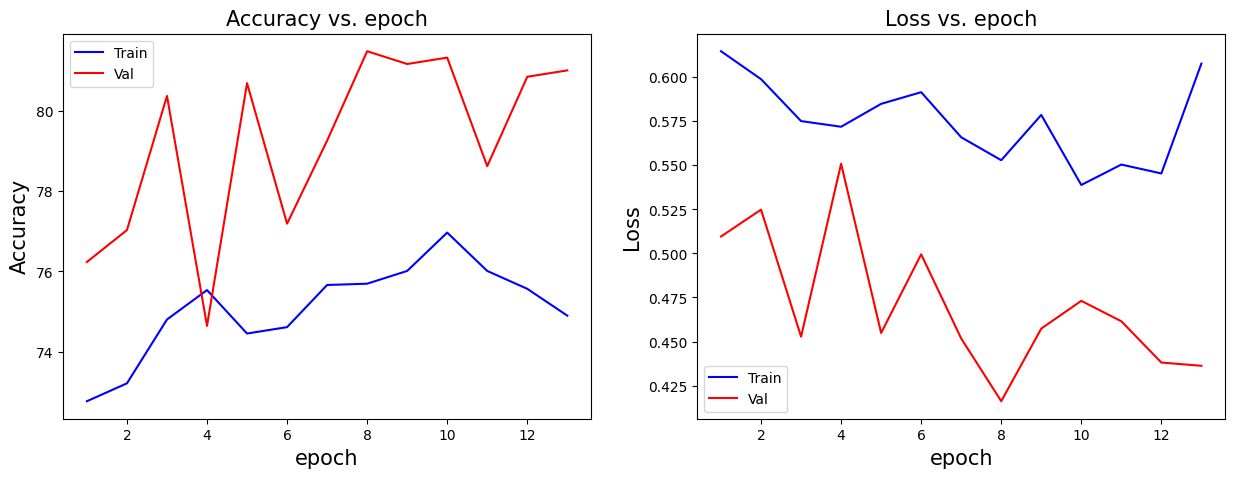

In [ ]:
plot_train_acc(model_fit)

The model is underfitting

11/11 [==============================] - 1s 102ms/step

Test Accuracy: 69.80%



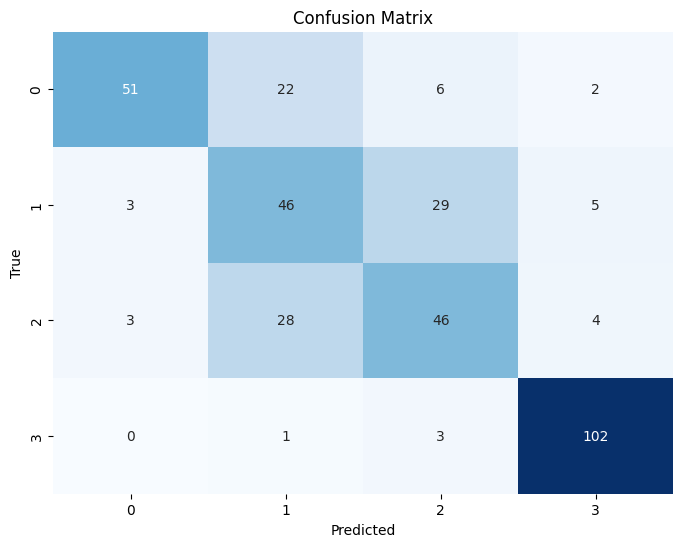

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74        81
           1       0.47      0.55      0.51        83
           2       0.55      0.57      0.56        81
           3       0.90      0.96      0.93       106

    accuracy                           0.70       351
   macro avg       0.70      0.68      0.68       351
weighted avg       0.72      0.70      0.70       351



In [ ]:
plot_acc_cm(test_data,model_inception)

In [ ]:
#Add layers, regulazization, drop out batch normalization to improve the output



model_inception_1 = keras.Sequential([
    base_model,
    layers.Flatten(),

    layers.Dense(2048, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(4, activation='softmax')
])

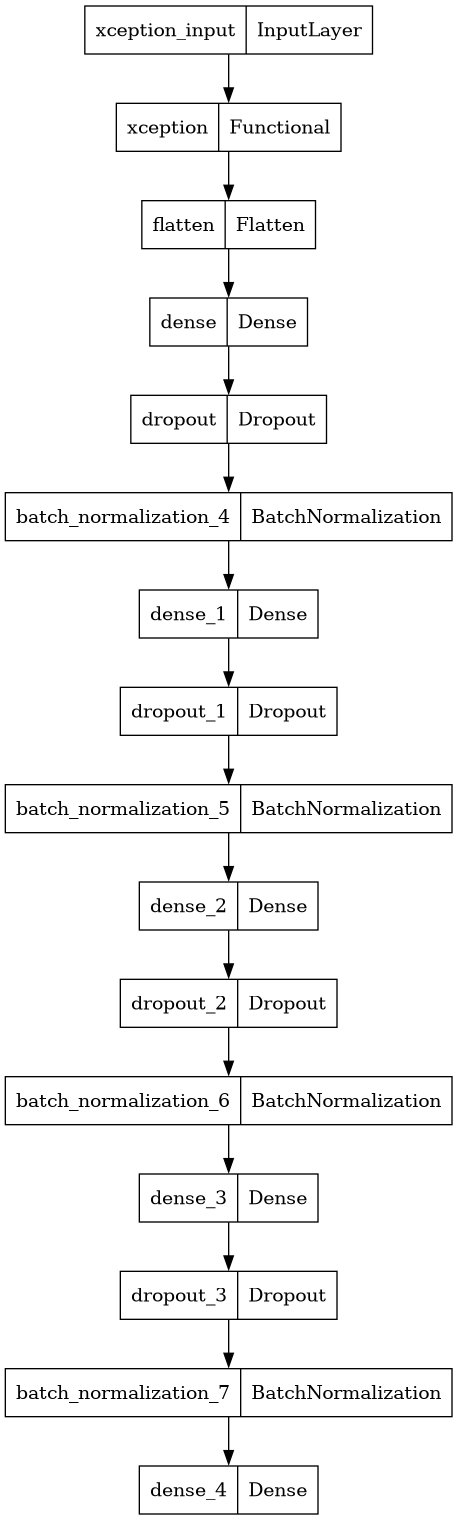

In [ ]:
plot_model(model_inception_1)

In [ ]:
# Compile the model with the learning rate schedule
model_inception_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model_inception_1.fit(
    train_data_augmented,
    validation_data=val_data,
    epochs=100, callbacks=[early_stopping_callback,LearningRateCallback()]
)

Epoch 1/100


I0000 00:00:1707955232.106824     114 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


98/98 [==============================] - 72s 602ms/step - loss: 1.5066 - accuracy: 0.3971 - val_loss: 1.4963 - val_accuracy: 0.4817
Epoch 2/100
98/98 [==============================] - 53s 533ms/step - loss: 1.1889 - accuracy: 0.5002 - val_loss: 0.8509 - val_accuracy: 0.5821
Epoch 3/100
98/98 [==============================] - 53s 537ms/step - loss: 1.0132 - accuracy: 0.5630 - val_loss: 0.8340 - val_accuracy: 0.6300
Epoch 4/100
98/98 [==============================] - 53s 540ms/step - loss: 0.9107 - accuracy: 0.6070 - val_loss: 0.6670 - val_accuracy: 0.6635
Epoch 5/100
98/98 [==============================] - 53s 541ms/step - loss: 0.8603 - accuracy: 0.6211 - val_loss: 0.6479 - val_accuracy: 0.6826
Epoch 6/100
98/98 [==============================] - 53s 539ms/step - loss: 0.8140 - accuracy: 0.6396 - val_loss: 0.6205 - val_accuracy: 0.6954
Epoch 7/100
98/98 [==============================] - 54s 549ms/step - loss: 0.8098 - accuracy: 0.6386 - val_loss: 0.6041 - val_accuracy: 0.7065
Epoc

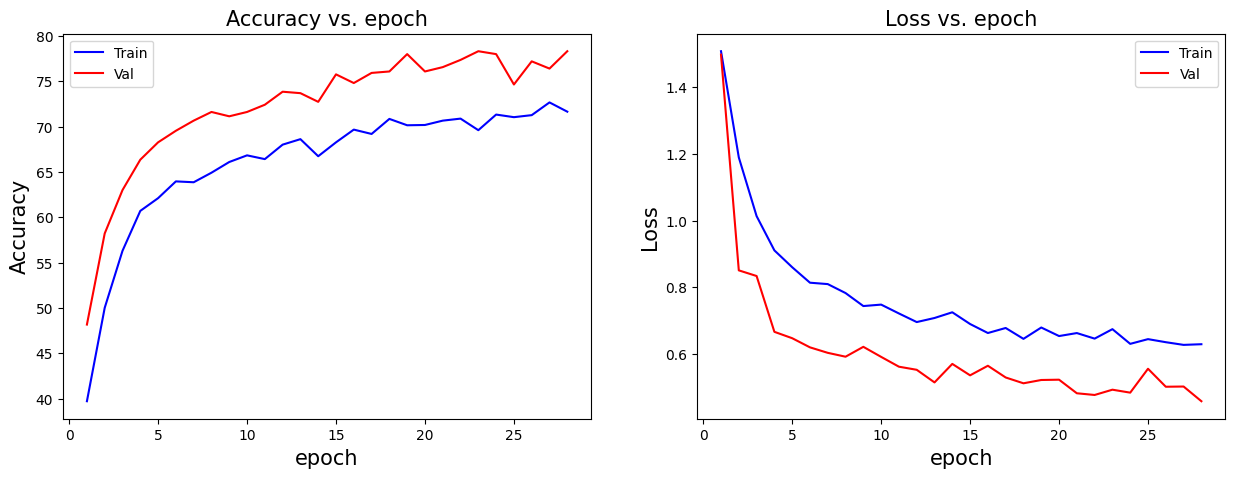

In [ ]:
plot_train_acc(model_fit)

11/11 [==============================] - 3s 161ms/step

Test Accuracy: 66.10%



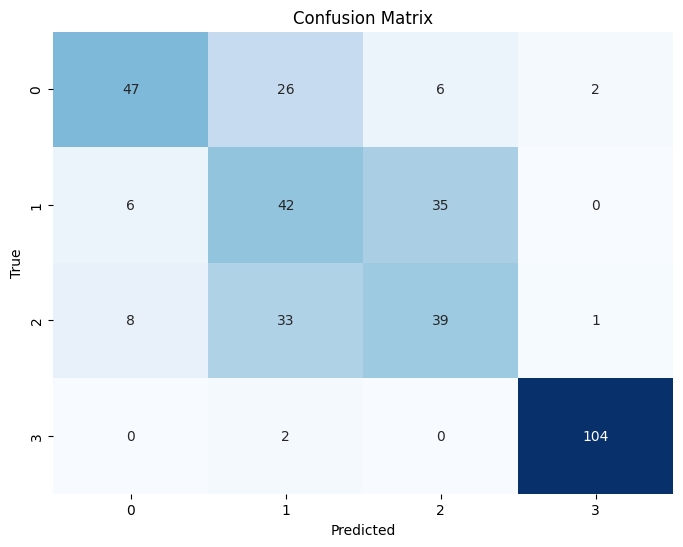

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.58      0.66        81
           1       0.41      0.51      0.45        83
           2       0.49      0.48      0.48        81
           3       0.97      0.98      0.98       106

    accuracy                           0.66       351
   macro avg       0.66      0.64      0.64       351
weighted avg       0.68      0.66      0.67       351



In [ ]:
plot_acc_cm(test_data,model_inception_1)

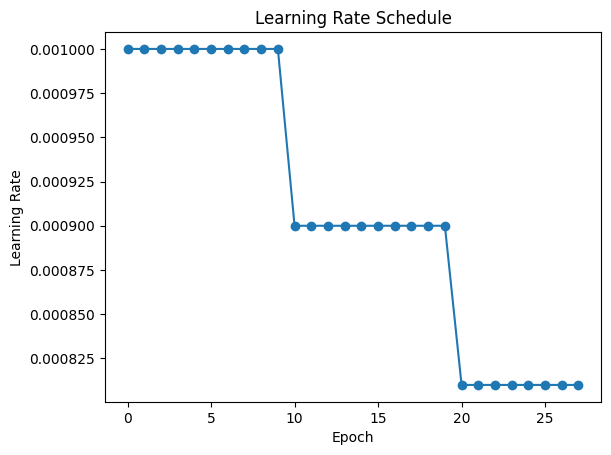

In [ ]:
plot_lr(learning_rates)

Trying latest CNN model

In [ ]:
#Load the base model
input_shape = (256, 256, 3)
base_model_1 = keras.applications.ConvNeXtTiny(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape,
    pooling=keras.layers.GlobalAveragePooling2D(),
    classifier_activation="softmax",
)

111650432/111650432 [==============================] - 1s 0us/step


In [ ]:


model_convnet = keras.Sequential([
    base_model_1,
    layers.Flatten(),

    layers.Dense(2048, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(4, activation='softmax')
])

In [ ]:
base_model_1.trainable = False

In [ ]:
model_convnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_fit = model_convnet.fit(
    train_data_augmented,
    validation_data=val_data,
    epochs=100, callbacks=[early_stopping_callback,LearningRateCallback()]
)

Epoch 1/100
98/98 [==============================] - 78s 693ms/step - loss: 0.4975 - accuracy: 0.8086 - val_loss: 0.2296 - val_accuracy: 0.9490
Epoch 2/100
98/98 [==============================] - 57s 576ms/step - loss: 0.2127 - accuracy: 0.9238 - val_loss: 0.0810 - val_accuracy: 0.9697
Epoch 3/100
98/98 [==============================] - 57s 576ms/step - loss: 0.1737 - accuracy: 0.9381 - val_loss: 0.0439 - val_accuracy: 0.9841
Epoch 4/100
98/98 [==============================] - 56s 574ms/step - loss: 0.1576 - accuracy: 0.9404 - val_loss: 0.0438 - val_accuracy: 0.9841
Epoch 5/100
98/98 [==============================] - 56s 569ms/step - loss: 0.1435 - accuracy: 0.9467 - val_loss: 0.0380 - val_accuracy: 0.9841
Epoch 6/100
98/98 [==============================] - 57s 575ms/step - loss: 0.1138 - accuracy: 0.9598 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 7/100
98/98 [==============================] - 55s 563ms/step - loss: 0.1032 - accuracy: 0.9646 - val_loss: 0.0253 - val_accuracy:

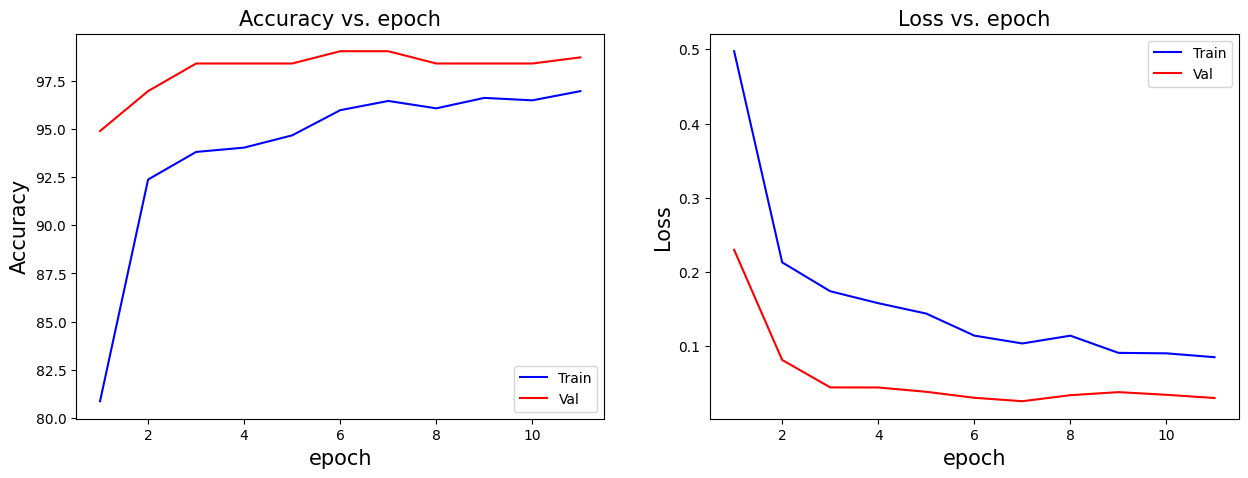

In [ ]:
plot_train_acc(model_fit)

11/11 [==============================] - 6s 414ms/step

Test Accuracy: 91.45%



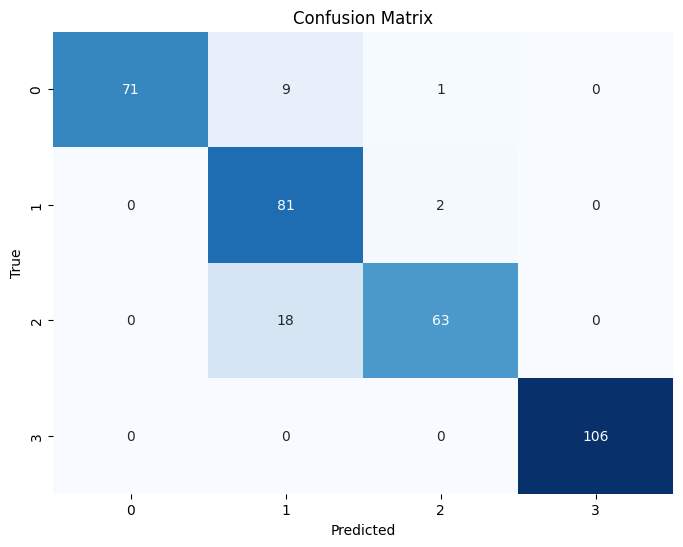

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        81
           1       0.75      0.98      0.85        83
           2       0.95      0.78      0.86        81
           3       1.00      1.00      1.00       106

    accuracy                           0.91       351
   macro avg       0.93      0.91      0.91       351
weighted avg       0.93      0.91      0.92       351



In [ ]:
plot_acc_cm(test_data,model_convnet)

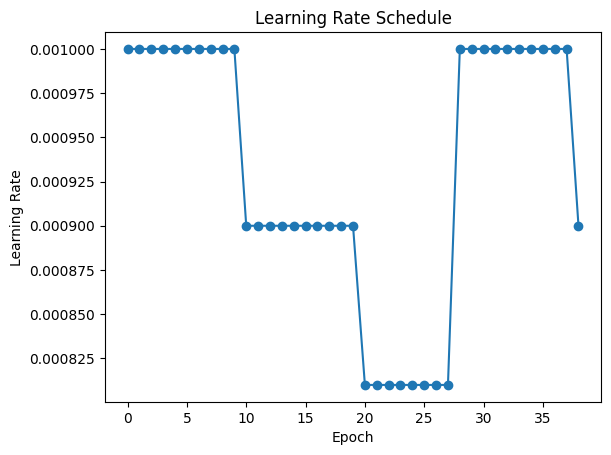

In [ ]:
plot_lr(learning_rates)

The issue is with label 1. Lets try to look at the data.


In [ ]:
from PIL import Image



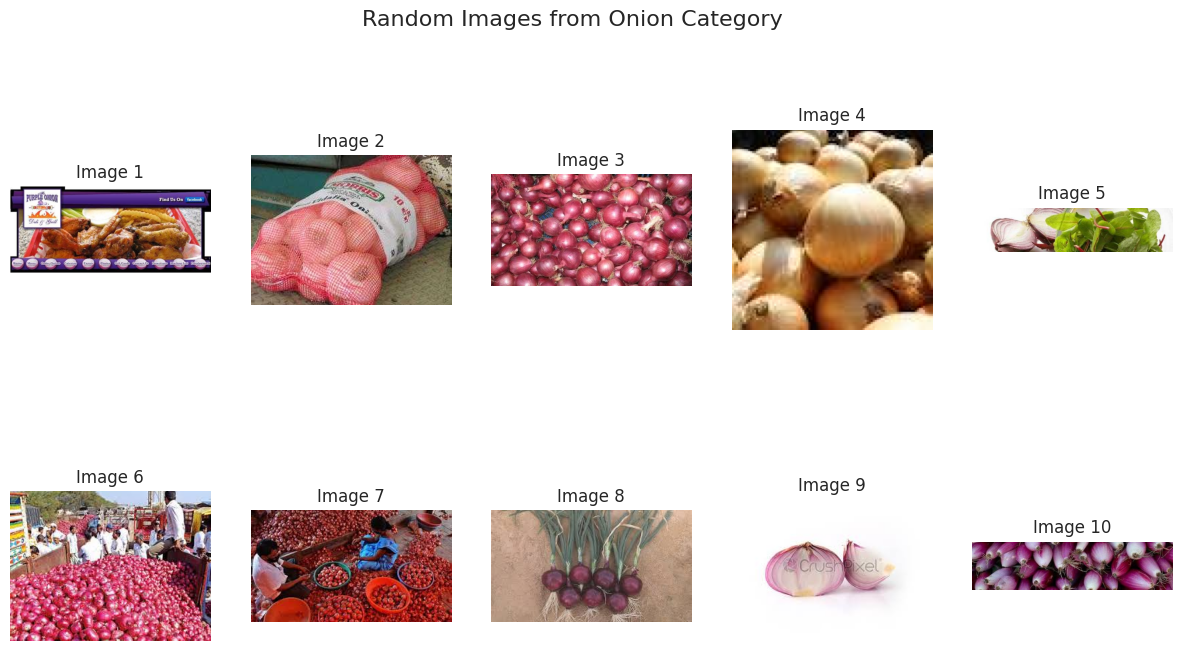

In [ ]:
# Set the path to the directory containing the 'Onion' images
onion_path = "/kaggle/working/ninjacart_data/train/onion"

# Get a list of all image files in the 'Onion' category
onion_images = [f for f in os.listdir(onion_path) if os.path.isfile(os.path.join(onion_path, f))]

# Select and display 10 random images from the list
plt.figure(figsize=(15, 8))

for i in range(10):
    # Select a random image from the list
    random_image = random.choice(onion_images)

    # Load and display the random image
    image_path = os.path.join(onion_path, random_image)
    img = Image.open(image_path)

    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Image {i + 1}")
    plt.axis('off')

plt.suptitle('Random Images from Onion Category', fontsize=16)
plt.show()

As we can see, there is mis label in the onion and matches with Indian market images, thus, giving us low value.